# 2020 Senate Election Odds

This notebook uses the implied state-by-state election odds from PredictIt.org and performs MonteCarlo simulations of US Senate results. The worksheet should be re-run to get the latest estimate.

## Imports

In [1]:
#!pip install pandas matplotlib

In [2]:
import requests
import time
import urllib.request
import json
from random import randint, random
import re
from matplotlib import pyplot as plt
import pandas as pd

## Store state electoral college votes

In [3]:


states = {
    'AL': { 'state':'Alabama', 'abbrev': 'AL', 'url': 6183, },
    'AK': { 'state':'Alaska', 'abbrev': 'AK', 'url': 6688, },
    'AZ': { 'state':'Arizona', 'abbrev': 'AZ', 'url': 5809, },
    'AR': { 'state':'Arkansas', 'abbrev': 'AR', 'url': 6827, }, 
    'CO': { 'state':'Colorado', 'abbrev': 'CO', 'url': 5810, }, 
    'DE': { 'state':'Delaware', 'abbrev': 'DE', 'url': 6808, },
    'GA': { 'state':'Georgia', 'abbrev': 'GA', 'url': 6651, },
    'GA2': { 'state':'Georgia', 'abbrev': 'GA', 'url': 6567, },  # TWO IN GA
    'ID': { 'state':'Idaho', 'abbrev': 'ID', 'url': 6810, },
    'IL': { 'state':'Illinois', 'abbrev': 'IL', 'url': 6830, },
    'IA': { 'state':'Iowa', 'abbrev': 'IA', 'url': 6648, },
    'KS': { 'state':'Kansas', 'abbrev': 'KS', 'url': 5781, },
    'KY': { 'state':'Kentucky', 'abbrev': 'KY', 'url': 6575, },
    'LA': { 'state':'Louisiana', 'abbrev': 'LA', 'url': 6813, },
    'ME': { 'state':'Maine', 'abbrev': 'ME', 'url': 5811, },
    'MA': { 'state':'Massachusetts', 'abbrev': 'MA', 'url': 6840, },
    'MI': { 'state':'Michigan', 'abbrev': 'MI', 'url': 6576, },
    'MN': { 'state':'Minnesota', 'abbrev': 'MN', 'url': 6761, },
    'MS': { 'state':'Mississippi', 'abbrev': 'MS', 'url': 6839 },
    'MT': { 'state':'Montana', 'abbrev': 'MT', 'url': 6568, },
    'NE': { 'state':'Nebraska', 'abbrev': 'NE', 'url': 6832, },
    'NH': { 'state':'New Hampshire', 'abbrev': 'NH', 'url': 6795, },
    'NJ': { 'state':'New Jersey', 'abbrev': 'NJ', 'url': 6801, },
    'NM': { 'state':'New Mexico', 'abbrev': 'NM', 'url': 6752, },
    'NC': { 'state':'North Carolina', 'abbrev': 'NC', 'url': 5808, },
    'OK': { 'state':'Oklahoma', 'abbrev': 'OK', 'url': 6841, },
    'OR': { 'state':'Oregon', 'abbrev': 'OR', 'url': 6786, },
    'RI': { 'state':'Rhode Island', 'abbrev': 'RI', 'url': 6842 },
    'SC': { 'state':'South Carolina', 'abbrev': 'SC', 'url': 6706, },
    'SD': { 'state':'South Dakota', 'abbrev': 'SD', 'url': 6826, },
    'TN': { 'state':'Tennessee', 'abbrev': 'TN', 'url': 6792, },
    'TX': { 'state':'Texas', 'abbrev': 'TX', 'url': 6788, },
    'VA': { 'state':'Virginia', 'abbrev': 'VA', 'url': 6821, },
    'WV': { 'state':'West Virginia', 'abbrev': 'WV', 'url': 6837 },
    'WY': { 'state':'Wyoming', 'abbrev': 'WY', 'url': 6797, },
}

## Pull state-by-state odds from PredictIt.org

In [4]:
def get_api_response(url):
    webURL = urllib.request.urlopen(url)
    data = webURL.read()
    encoding = webURL.info().get_content_charset('utf-8')
    return json.loads(data.decode(encoding))

In [5]:
# Urls are in this format: e.g. https://www.predictit.org/api/Market/5781/Contracts

state_abbr = 'AK'

url = 'https://www.predictit.org/api/Market/%d/Contracts' % states[state_abbr]['url']

market = get_api_response(url)

# Test url
#url, market

## Extract prices and match with full state names 

In [9]:
state_prices = []
for abbrev, state in list(states.items()):
    
    if state['url'] is not None:
        url = 'https://www.predictit.org/api/Market/%d/Contracts' % state['url']
        market = get_api_response(url)
        price = next(contract for contract in market if contract['contractName'] != 'Republican')['lastClosePrice']
    else:
        price = 0.9 if state['presumed'] == 'D' else 0.1
        
    state_prices.append({ 
        'dem_price': price, 
        'state_abbrev': state['abbrev'], 
        'state': state['state'],
    })
    
    print('Got', abbrev, price)
    time.sleep(2)    

Got AL 0.12
Got AK 0.32
Got AZ 0.86
Got AR 0.01
Got CO 0.85
Got DE 0.98
Got GA 0.38
Got GA2 0.39
Got ID 0.03
Got IL 0.96
Got IA 0.58
Got KS 0.29
Got KY 0.11
Got LA 0.08
Got ME 0.76
Got MA 0.96
Got MI 0.78
Got MN 0.91
Got MS 0.18
Got MT 0.44
Got NE 0.02
Got NH 0.93
Got NJ 0.96
Got NM 0.94
Got NC 0.64
Got OK 0.05
Got OR 0.97
Got RI 0.96
Got SC 0.33
Got SD 0.04
Got TN 0.05
Got TX 0.22
Got VA 0.96
Got WV 0.04
Got WY 0.04


In [10]:
pd.DataFrame(state_prices)

,dem_price,state_abbrev,state
0,0.12,AL,Alabama
1,0.32,AK,Alaska
2,0.86,AZ,Arizona
3,0.01,AR,Arkansas
4,0.85,CO,Colorado
5,0.98,DE,Delaware
6,0.38,GA,Georgia
7,0.39,GA,Georgia
8,0.03,ID,Idaho
9,0.96,IL,Illinois


## Define a simulation of one Senate election outcome

In [19]:
def generate_dem_election(log=False):
    # 33 dem + 2 dem caucusing independent seats not up for election 
    dem_votes_tot = 35 
    
    for state in state_prices:
        won = random() < (state['dem_price'])
        dem_votes = 1 if won else 0
        dem_votes_tot += dem_votes
        
        if log:
            print(dem_votes, 'in', state)
    
    return dem_votes_tot     

In [20]:
# Test election
# generate_dem_election(True)

## Run many simulated elections

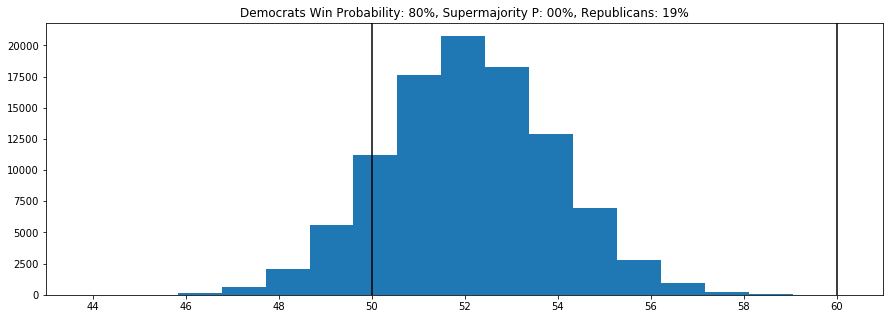

Democrats Win Probability: 80.46799999999999%, Supermajority P: 0.011000000000000001%, Republicans: 19.532000000000004%


In [22]:
n_elections = 100000

election_set = [generate_dem_election() for n in range(n_elections)]
wins = len([el for el in election_set if el >= 51]) # Assuming 50-50 and Biden -> Dems gain majority
dem_p = wins / len(election_set)
rep_p = 1 - dem_p

supermajority = len([el for el in election_set if el >= 60]) 
dem_super_p = supermajority / len(election_set)

plt.figure(figsize=(15,5))
plt.xlim((43,61))
plt.hist(election_set, bins=18)
plt.axvline(x=50, c='black')
plt.axvline(x=60, c='black')
plt.title('Democrats Win Probability: %.2d%%, Supermajority P: %.2d%%, Republicans: %.2d%%' % (dem_p*100, dem_super_p * 100, rep_p*100))
plt.show()

print('Democrats Win Probability: %s%%, Supermajority P: %s%%, Republicans: %s%%' % (dem_p*100, dem_super_p * 100, rep_p*100))